# Compute and Plot Variance Analysis

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[6]:

import sys
import pandas as pd
import networkx as nx
import joblib 
import glob
import numpy as np
import scipy
import random
import itertools
from collections import Counter
from statsmodels.stats.weightstats import DescrStatsW
import os

#-----------------------------IMPORTANT-------------------------------------------
### VERY IMPORTANT: Changing the path from library to library2 change the folder of original results
import sys
sys.path.insert(0, '../Script/library3/')
str_prepr = "_full_prepr"

from utilities import *
from plots import *

#------------------------------------------------------------------------

### Set Seed randomization

In [2]:
seed = int(0)

### Define randomizations


In [3]:



def shuffle_timestamp(df,ts):
    df1 = df.copy()
    random.seed(seed)
    times = ts.index.unique()
    shape1 = ts.index.unique().shape[0]
    df1['timestamp'] = df1['timestamp'].apply(lambda x: times[np.random.randint(0,shape1)])
    return df1
    
    
    

In [ ]:
# In[17]:

for seed in range(10):

    cnt_list = {}
    list1 = {}
    list_mean1 = {}
    list_size_mean1 = {}
    list_size_var1 = {}
    beta_data = {}
    beta_detrend = {}

    for title1 in ['tij_lnVS2','Hospital','highschool_2012','SFHH']:
        print title1



        df = get_df(title1)
        dt = int(min([x for x in df.timestamp.shift(-1)- df.timestamp if x!=0 and np.isnan(x)==False ]))
        print int(max([x for x in df.timestamp.shift(-1)- df.timestamp if x!=0 and np.isnan(x)==False ]))
        df.timestamp = pd.to_datetime(df.timestamp.values,unit='s')

        ts = df.groupby(df.timestamp).size().resample(str(dt)+'s').sum().fillna(0)
        df1 = shuffle_timestamp(df,ts)

        print 'd'
        ts1 = ts.copy()
        random.seed(seed)
        random.shuffle(ts1.values)
        seed = str(seed)


        ts2 = df1.groupby(df1.timestamp).size().resample(str(dt)+'s').sum().fillna(0)

        var1,var2 = [x.var() for x in [ts,ts1] ]

        print sum(ts),sum(ts1)
        print  ts.shape,ts1.shape

        list1[title1+'_var'] = var1
        list1[title1+'rand'+'_var'] = var2







        list1[title1+'rand'] = {}
        list1[title1] = {}

        list_mean1[title1+'rand'] = {}
        list_mean1[title1] = {}

        list_size_mean1[title1+'rand'] = {}
        list_size_mean1[title1] = {}



        list_size_var1[title1+'rand'] = {}
        list_size_var1[title1] = {}


        for i in range(1,1011):

            ts_res,ts1_res = [y.resample(str(dt*i)+'s') for y in  [ts,ts1] ]





            ts_res_mean,ts1_res_mean = [y.mean() for y in  [ts_res,ts1_res] ]
            ts_res_sum,ts1_res_sum = [y.sum() for y in  [ts_res,ts1_res] ]

            print ts.shape[0],i, ts.shape[0]//i,ts_res_mean.shape[0]
            assert ts_res_sum.shape[0] == ts1_res_sum.shape[0]
            assert ts_res_sum.sum()==ts1_res_sum.sum() 

            ts_res_mean,ts1_res_mean = [y.iloc[:ts.shape[0]//i] for y in ts_res_mean,ts1_res_mean]
            ts_res_sum,ts1_res_sum = [y.iloc[:ts.shape[0]//i] for y in ts_res_sum,ts1_res_sum]

            print ts.shape[0],i,ts_res_mean.shape[0]
            assert ts_res_sum.shape[0] == ts1_res_sum.shape[0]



            if ts_res_mean.shape[0] < 100: break
            list1[title1][i] = ts_res_mean.var()
            list1[title1+'rand'][i] = ts1_res_mean.var()


            list_mean1[title1][i] = ts_res_mean.mean()
            list_mean1[title1+'rand'][i] = ts1_res_mean.mean()

            list_size_mean1[title1][i] = ts_res_sum.mean()
            list_size_mean1[title1+'rand'][i] = ts1_res_sum.mean()

            list_size_var1[title1][i] = ts_res_sum.var()
            list_size_var1[title1+'rand'][i] = ts1_res_sum.var()






            cnt_list = [w.values.astype('bool').sum() for w in [ts_res_sum,ts1_res_sum]]
            print '\n'
            assert cnt_list == [w.values.astype('bool').sum() for w in [ts_res_mean,ts1_res_mean]]
            if ts.shape[0]%i == 0: assert ts_res_sum.sum()==ts1_res_sum.sum() 









        try:os.mkdir('../Results/Coarse_Grain/')
        except: print ''
        print '/tudelft.net/staff-bulk/ewi/insy/MMC/aceria/Temporal_Network/Coarse_Grain/'


        



        joblib.dump(list1,'../Results/Coarse_Grain/gen_activity_var_seed_short'+seed+title1+'.joblib')
        joblib.dump(list_mean1,'../Results/Coarse_Grain/gen_activity_mean_seed_short'+seed+title1+'.joblib')
        joblib.dump(list_size_mean1,'../Results/Coarse_Grain/gen_activity_size_mean_seed_short'+seed+title1+'.joblib')
        joblib.dump(list_size_var1,'../Results/Coarse_Grain//gen_activity_size_var_seed_short'+seed+title1+'.joblib')

tij_lnVS2
1940
d
78246 78246
(20947,) (20947,)
20947 1 20947 20947
20947 1 20947


20947 2 10473 10474
20947 2 10473


20947 3 6982 6983
20947 3 6982


20947 4 5236 5237
20947 4 5236


20947 5 4189 4190
20947 5 4189


20947 6 3491 3492
20947 6 3491


20947 7 2992 2993
20947 7 2992


20947 8 2618 2619
20947 8 2618


20947 9 2327 2328
20947 9 2327


20947 10 2094 2095
20947 10 2094


20947 11 1904 1905
20947 11 1904


20947 12 1745 1746
20947 12 1745


20947 13 1611 1612
20947 13 1611


20947 14 1496 1497
20947 14 1496


20947 15 1396 1397
20947 15 1396


20947 16 1309 1310
20947 16 1309


20947 17 1232 1233
20947 17 1232


20947 18 1163 1164
20947 18 1163


20947 19 1102 1103
20947 19 1102


20947 20 1047 1048
20947 20 1047


20947 21 997 998
20947 21 997


20947 22 952 953
20947 22 952


20947 23 910 911
20947 23 910


20947 24 872 873
20947 24 872


20947 25 837 838
20947 25 837


20947 26 805 806
20947 26 805


20947 27 775 776
20947 27 775


20947 28 748 749
20947 28 748


20947 29 

### Plot Results

DNC_Mail_part2
ME
CollegeMsg
EU
sg_infectious_contact
primaryschool
highschool_2012
highschool_2013
ht09_contact
SFHH
tij_lnVS
tij_lnVS2
Hospital


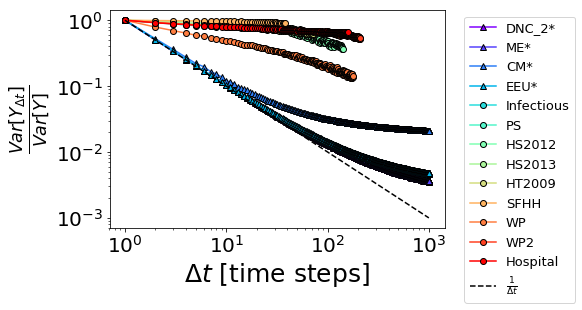

In [2]:
##### one side no final
def plot_variance_scaling_data(title1):
    if title1 != 'tij_lnVS':
        file1 = [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*') if title1 in y][0]
    else:
        file1 = [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*') if ((title1 in y) and ('tij_lnVS2' not in y))][0]
    return  pd.Series(joblib.load(file1)[title1])/joblib.load(file1)[title1+'_var']

def plot_variance_scaling_mean(title1,rand):
    if title1 != 'tij_lnVS':
        return  pd.concat([pd.Series(joblib.load(x)[title1+rand])/joblib.load(x)[title1+rand+'_var'] for x in [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*') if title1 in y]],axis=1).mean(axis=1)
    else:
        return  pd.concat([pd.Series(joblib.load(x)[title1+rand])/joblib.load(x)[title1+rand+'_var'] for x in [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*') if ((title1 in y) & ('tij_lnVS2' not in y))]],axis=1).mean(axis=1)

def plot_variance_scaling_std(title1,rand):
    if title1 != 'tij_lnVS':
        return pd.concat([pd.Series(joblib.load(x)[title1+rand])/joblib.load(x)[title1+rand+'_var'] for x in [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*') if title1 in y]],axis=1).std(axis=1)
    else:
        return pd.concat([pd.Series(joblib.load(x)[title1+rand])/joblib.load(x)[title1+rand+'_var'] for x in [y for y in glob.glob('../Results/Coarse_Grain/gen_activity_var_seed_short*')if ((title1 in y) & ('tij_lnVS2' not in y))]],axis=1).std(axis=1)



import seaborn as sns

i = 0
for title1 in mail_list:
    print title1
    marker = '^'
    a =  plot_variance_scaling_data(title1)
    plt.plot(a.index,a.values,label = title_to_paper_name[title1],color = color_dic[title1],marker = marker,markeredgecolor="black")
    
#     for rand in ['rand']:
#         a =  plot_variance_scaling_mean(title1,rand)  
#         b = plot_variance_scaling_std(title1,rand)  
#         plt.errorbar(x=a.index,y=a.values,color = color_dic[title1])
#     plt.loglog()

#     i+=1

for title1 in human_contact_list:

    marker = 'o'
    print title1
    a =  plot_variance_scaling_data(title1)

    plt.plot(a.index,a.values,label = title_to_paper_name[title1],color = color_dic[title1],marker = marker,markeredgecolor="black")
#     for rand in ['rand']:
#         a =  plot_variance_scaling_mean(title1,rand)  
#         b = plot_variance_scaling_std(title1,rand)  
#         plt.plot(x=a.index,y=a.values,color = color_list[i])     
#     plt.loglog()
#     i+=1

plt.plot(np.arange(1,1000),[1./x for x in np.arange(1,1000)],color = 'k',linestyle="--",label = r'$\frac{1}{\Delta t}$')  
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 13})
plt.xlabel(r'$\Delta t$ [time steps]',size = 25)
plt.ylabel(r"$\frac{Var[Y_{\Delta t}]}{Var[Y]}$",size = 25)
plt.xticks(fontsize= 20)
plt.yticks(fontsize = 20)
plt.loglog()
plt.show()
#plt.savefig('variance_scaling'+s+'/variance_scaling_nat_unit_no_final.eps',format = 'eps',bbox_inches = 'tight')
#plt.savefig('variance_scaling'+s+'/fig3.eps',format = 'eps',bbox_inches = 'tight')